**Major Project: Employee Attrition**

In [4]:
#Importing necessary libraries
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report


In [5]:
#Loading the dataset
data = pd.read_csv("C:\\Users\\Tisha\\Downloads\\archive (2)\\Employee-Attrition.csv")

DATA ANALYSIS

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.shape

(1470, 35)

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

C:\Users\Tisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

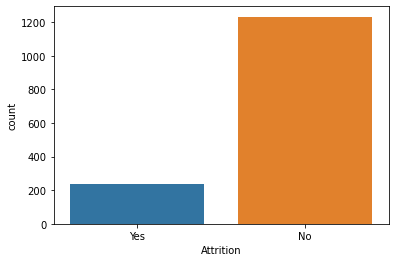

In [19]:
sns.countplot(data['Attrition' ])
#attrdata['Gender '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

In [21]:
attrition_dummies = pd.get_dummies(data['Attrition'])
df = pd.concat([data, attrition_dummies] , axis = 1)

In [22]:
df = df.drop(['Attrition' , 'No'] , axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


<AxesSubplot:xlabel='Gender', ylabel='Yes'>

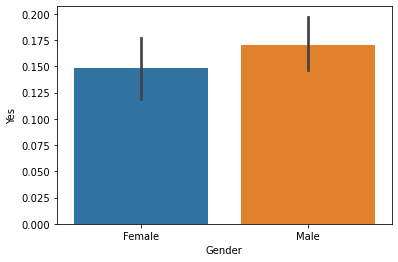

In [23]:
sns.barplot(x = 'Gender' , y = 'Yes', data = df)

<AxesSubplot:xlabel='Department', ylabel='Yes'>

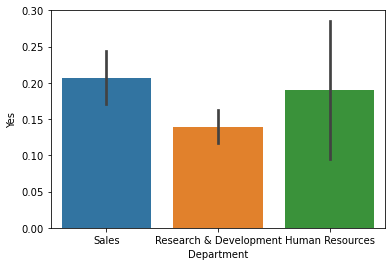

In [24]:
sns.barplot(x = 'Department', y = 'Yes', data = df)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Yes'>

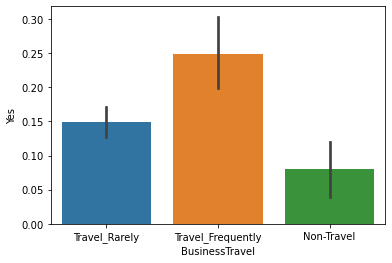

In [25]:
sns.barplot(x = 'BusinessTravel', y = 'Yes', data = df)

<AxesSubplot:>

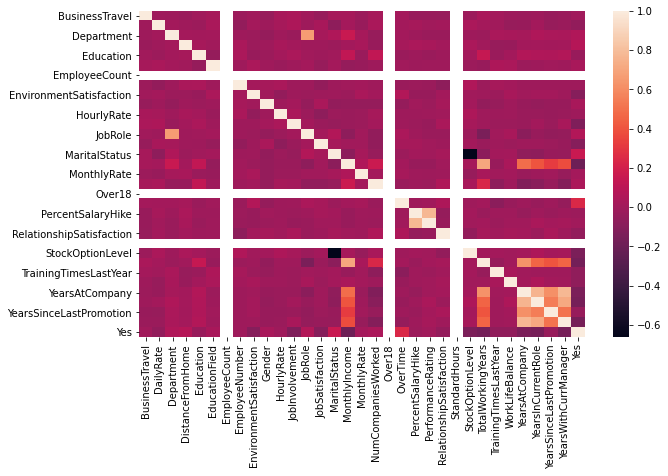

In [57]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

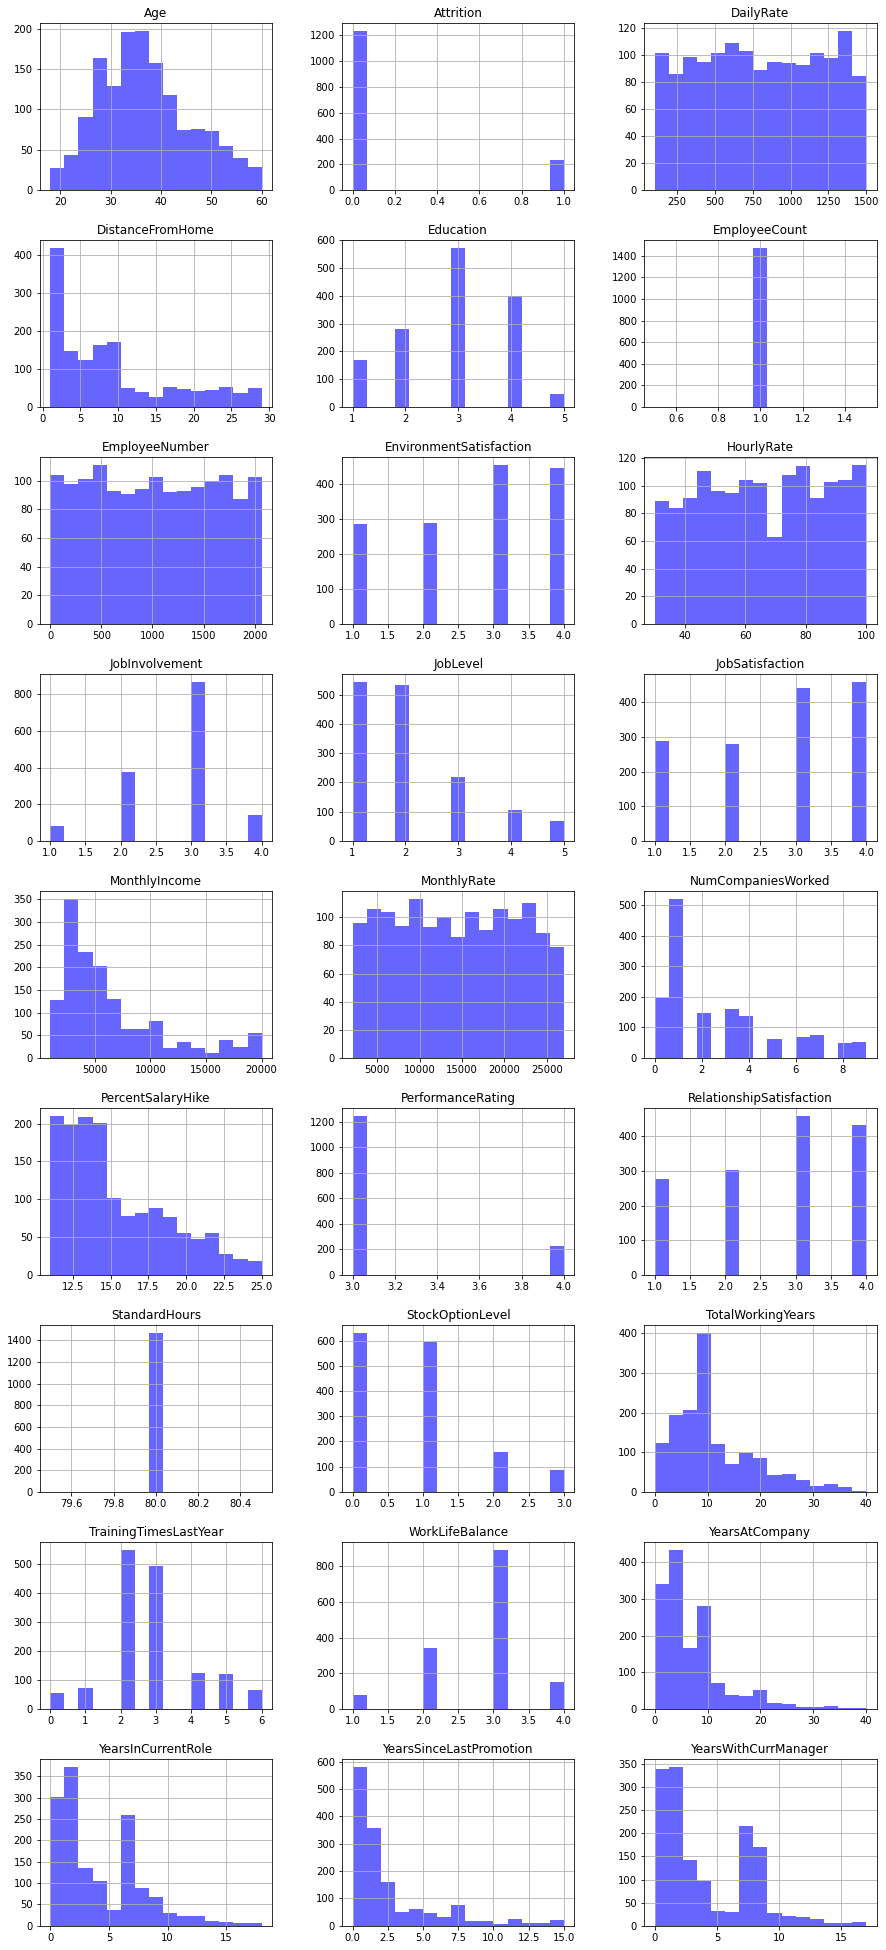

In [27]:
#Visualizing numerical columns
data['Attrition'].replace({'No':0,'Yes':1},inplace=True)
num_cols = data.select_dtypes(include = np.number)
a = num_cols[num_cols.columns].hist(bins=15, figsize=(15,35), layout=(9,3),color = 'blue',alpha=0.6)


Three models that we will be using are: RandomForest Classifier , LDA and Logistic Regression 

1: RANDOMFOREST CLASSIFIER

In [28]:
df = df.drop(['Age' , 'JobLevel'], axis = 1)

DATA PROCESSING:

In [29]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-29-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


BUILDING MODEL:

In [30]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [31]:
x  = df.drop(['Yes'], axis = 1)
y = df['Yes']

In [32]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [33]:
x_train.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,2,295,2,4,2,2,0,338,3,0,...,2,0,3,10,2,2,10,9,1,2
363,2,159,2,4,2,2,0,363,3,0,...,1,0,0,1,2,2,1,0,0,0
759,2,437,0,23,3,3,0,759,1,1,...,0,0,0,6,3,2,6,3,0,4
793,2,502,1,14,1,1,0,793,0,1,...,3,0,1,4,5,1,4,2,2,2
581,2,516,1,0,2,1,0,581,3,1,...,2,0,2,7,2,2,2,2,0,2


In [34]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
rf.score(x_train, y_train)

0.9815354713313897

In [36]:
prediction = rf.predict(x_train)

In [37]:
pred = rf.predict(x_test)

Confusion matrix of the model

In [38]:
cmatrix = confusion_matrix(y_test, pred)
cmatrix

array([[367,   4],
       [ 61,   9]], dtype=int64)

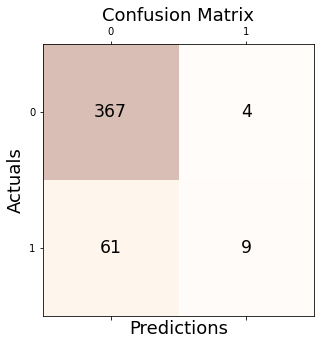

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Plotting a graph to study the accuracy and F1 Score of the model.

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.69      0.13      0.22        70

    accuracy                           0.85       441
   macro avg       0.77      0.56      0.57       441
weighted avg       0.83      0.85      0.81       441



In [48]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.21686746987951805

In [49]:
#training accuracy
accuracy_score(y_train, prediction)

0.9815354713313897

In [50]:
#testing accuracy
accuracy_score(y_test, pred)

0.8526077097505669

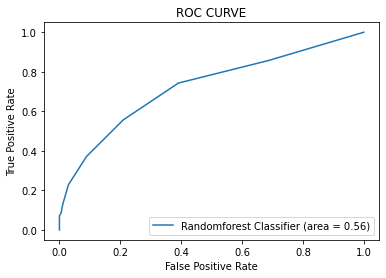

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Randomforest Classifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.savefig('ROC')

2. Logistic Regression

BUILDING MODEL:

In [61]:
cat_col = data.select_dtypes(exclude=np.number)
cat_col.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [62]:
data[['StandardHours','EmployeeCount']].describe()

,StandardHours,EmployeeCount
count,1470.0,1470.0
mean,80.0,1.0
std,0.0,0.0
min,80.0,1.0
25%,80.0,1.0
50%,80.0,1.0
75%,80.0,1.0
max,80.0,1.0


In [63]:
data[['StandardHours','EmployeeCount']].corr()

,StandardHours,EmployeeCount
StandardHours,NaN,NaN
EmployeeCount,NaN,NaN


In [64]:
cat_col_encoded = pd.get_dummies(cat_col)
cat_col_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [65]:
dataframe = pd.concat([num_cols,cat_col_encoded],sort=False,axis=1)
dataframe.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


BUILDING MODEL

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

In [68]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [69]:
logreg.score(X_train,y_train)

0.8736637512147716

In [70]:
prediction=logreg.predict(X_train)
test_Pred = logreg.predict(X_test)
cmatrix = metrics.confusion_matrix(y_test,test_Pred)
cmatrix

array([[364,   7],
       [ 43,  27]], dtype=int64)

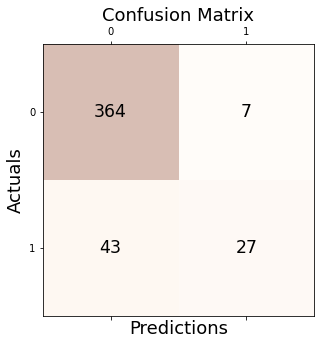

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [72]:
metrics.accuracy_score(y_train,prediction)

0.8736637512147716

In [73]:
metrics.accuracy_score(y_test,test_Pred)

0.8866213151927438

In [74]:
f1_score(y_test,test_Pred)

0.5192307692307693

In [75]:
print(classification_report(y_test, test_Pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       371
           1       0.79      0.39      0.52        70

    accuracy                           0.89       441
   macro avg       0.84      0.68      0.73       441
weighted avg       0.88      0.89      0.87       441



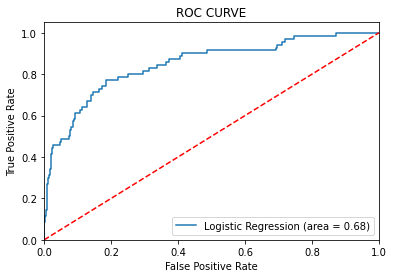

In [76]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

3.Decision Tree

In [77]:
dataframe.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


BUILDING MODEL



In [78]:
x = dataframe.drop(columns='Attrition')
y = dataframe['Attrition']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [79]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
tree_clf.score(X_train, y_train)

1.0

In [81]:
prediction = tree_clf.predict(X_train)
test_Pred = tree_clf.predict(X_test)
cmatrix = metrics.confusion_matrix(y_test,test_Pred)
cmatrix

array([[324,  47],
       [ 45,  25]], dtype=int64)

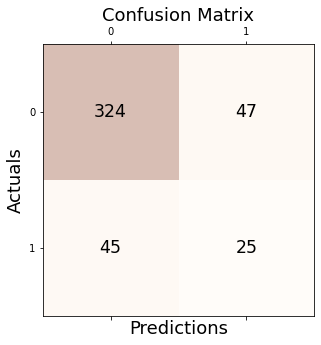

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cmatrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show() 

In [83]:
metrics.accuracy_score(y_train,prediction)

1.0

In [84]:
metrics.accuracy_score(y_test,test_Pred)

0.7913832199546486

In [85]:
f1_score(y_test,test_Pred)

0.35211267605633806

In [86]:
print(classification_report(y_test, test_Pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       371
           1       0.35      0.36      0.35        70

    accuracy                           0.79       441
   macro avg       0.61      0.62      0.61       441
weighted avg       0.79      0.79      0.79       441



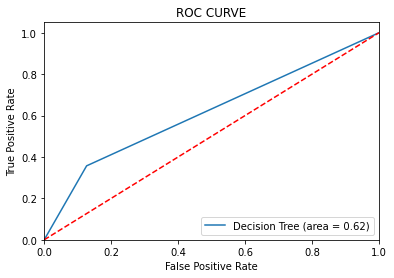

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, tree_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

4: Explain in the brief why you have chosen this model.

We have used three models :RandomForest Classifier, Logistic Regression and DecisionTree Classifier

**DecisionTree Classifier**

model score : 1.0

f1_score: 0.35211267605633806

Training Accuracy_score: 1.0

Testing Accuracy_score: 0.7913832199546486

**Logistic Regression**

model score : 0.8901846452866861

f1_score: 0.5192307692307693

Training Accuracy_score: 0.8736637512147716

Testing Accuracy_score: 0.8866213151927438

**RandomForest Classifier**

model score : 0.9815354713313897

f1_score: 0.21686746987951805

Training Accuracy_score: 0.9815354713313897

Testing Accuracy_score: 0.8526077097505669

Considering all the factors, Logistic Regression is found to be the best model.

5: Choose any three examples to show the accuracy of the predictions of employee attrition.

In [88]:
dataframe.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender

In [95]:
employee1=[[2,312,1,1,4,0,3,3,3,0,60,4,4,3,5265,6804,4,0,1,13,3,4,0,1,10,3,2,8,7,3,0,0]]
print(rf.predict_proba(employee1))

[[0.6 0.4]]


In [109]:
employee2=[[48,1,370,1,1,1,4,4,49,3,1,4,5900,4000,5,16,12,3,80,0,6,3,3,0,5,0,1,0,0,1,1,0]]
print(logreg.predict_proba(employee2))

[[1. 0.]]


In [99]:
employee3=[[48,1,370,1,1,1,4,4,49,3,1,4,5900,4000,5,16,12,3,80,0,6,3,3,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0]]
print(tree_clf.predict_proba(employee3))

[[1. 0.]]
